### Random number generation

We will use random module from numpy.

In [9]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
random.seed(0) # setting the seed for reproducibility

In [3]:
# random float number between 0 and 1
print(random.rand())

0.5488135039273248


In [4]:
# you can use rand() to generate random number between any two values
print("A random number between 0 and 100:\t", random.rand() * 100)
print("A random number between -10 and 0:\t", random.rand() * (-10))
print("A random number between -100 , 50:\t", random.rand() * (-150) + 50)

A random number between 0 and 100:	 71.51893663724195
A random number between -10 and 0:	 -6.027633760716439
A random number between -100 , 50:	 -31.732477449534528


In [7]:
# you can use randint() to generate integers between two numbers
coin_dict = {0:'Head', 1:'Tail'}
print("Simulate a coin:\t", coin_dict[random.randint(0,2)])
print("Simulate a dice:\t", random.randint(1,7))

Simulate a coin:	 Head
Simulate a dice:	 6


In [244]:
# simulate a random walk and visualize it
# if a dice is 1,2,3,4 you go one step down
# if it is 5 you go one step up
# if it is 6 you throw dice again and get a prize of going up 5 times of what dice shows
# you have 0.5%  chance of falling, when you fall you will drop to 80% of where you are
# visualize the results for 1000 step, will you reach 60?
walks = []
moves = []
for _ in range(5): # 20 random walks
    steps = [0]
    movements = []
    for _ in range(500):
        dice_simulate = random.randint(1,7) # between 0 and 6
        if dice_simulate in [1,2,3,4]:
            last_step = steps[-1]
            steps.append(max(0,last_step - 1)) # dont go downstairs
            movements.append(-1 if last_step - 1 > 0 else 0 )
        elif dice_simulate in [5]:
            steps.append(steps[-1] + 1)
            movements.append(1)
        else:
            prize_walk = random.randint(1,7)
            steps.append(steps[-1] + prize_walk * 5)
            movements.append(prize_walk * 5)
        # there is 1% chance that you go jump to the first step while trying to go up
        if random.rand() <= 0.005:
            movements[-1] = - steps[-1] * 0.2  # we fall this many steps back to the base
            steps[-1] = steps[-1] * 0.8 # current step is base

    walks.append(steps)
    moves.append(movements)
walks = np.array(walks)
moves = np.array(moves)

Text(0,0.5,'Walk')

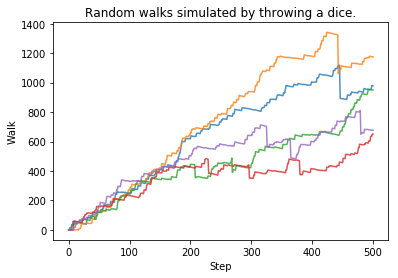

In [245]:
plt.plot(walks.T, alpha=0.8)
plt.title('Random walks simulated by throwing a dice.')
plt.xlabel('Step')
plt.ylabel('Walk')

In [246]:
## what is the expected value of this walk? 
## In other words on average how many steps we are performing?
walk_means = np.mean(moves,1)
print("The expected value of the steps: {:.2f} and its standard deviation: {:.2f}".format(np.mean(moves), np.std(walk_means)))

The expected value of the steps: 1.78 and its standard deviation: 0.39
